## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [41]:
# loading the files in "df"
df = pd.read_csv("ab_data.csv")
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [42]:
# Finding the numer of rows (rows,columns)
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [43]:
# The length of the unique values
df.user_id.unique().size

290584

d. The proportion of users converted.

In [44]:
# Unique users that was converted length / unique unique values length 
df[df.converted == 1].user_id.unique().size/df.user_id.unique().size

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [45]:
# People number that from wrong groups and pages
df.query("group == 'treatment' & landing_page == 'old_page'").user_id.count() + \
df.query("group == 'control' & landing_page == 'new_page'").user_id.count()

3893

f. Do any of the rows have missing values?

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
# Creating a DataFrame with correct people
df2 = df[( (df.group == 'treatment') & (df.landing_page == 'new_page') ) | \
         ( (df.group == 'control'  ) & (df.landing_page == 'old_page') )]



In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2.query("group == 'treatment' & landing_page == 'old_page'").user_id.count() + \
df2.query("group == 'control' & landing_page == 'new_page'").user_id.count()

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
# Check for duplicates values
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
# Finding the duplicate value
df2[df2.user_id.duplicated()]

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [51]:
# Finding the missing row index number
df2[df2.user_id.duplicated()].index[0]

2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
# Drop the row that represents the duplicated value
df2.drop(df2[df2.user_id.duplicated()].index, inplace = True)
df2[df2.user_id.duplicated()]

C:\Users\Daniel Vieira\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [53]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [54]:
# Querying only control group 
p_cont = df2.query("group == 'control'").converted.mean()
p_cont

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [55]:
# Querying only control treatment group 
p_treat = df2.query("group == 'treatment'").converted.mean()
p_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [56]:
# Querying only new_pages
df2.query('landing_page == "new_page"').shape[0]/df.shape[0]

0.4934494257635545

In [57]:
# Looking to basic statistics from the two study groups
df_grp = df.groupby('group')
df_grp.describe()['converted']

count      mean       std  min  25%  50%  75%  max
group                                                           
control    147202.0  0.120399  0.325429  0.0  0.0  0.0  0.0  1.0
treatment  147276.0  0.118920  0.323695  0.0  0.0  0.0  0.0  1.0

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<font color = blue>
No, the result is to close, we need do a A/B test to validade the results

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<font color = "blue">
h0  =   p_new <= p_old

h1 =    p_new > p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [58]:
# finding que probability to be true
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [59]:
# finding que probability to be true
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [60]:
# rows number from treament group
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [61]:
# rows number from control group
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
new_page_converted = (np.random.choice([1,0], size=n_new, p=(p_new, 1-p_new))).mean()
new_page_converted

0.11869795609386828

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [63]:
old_page_converted = (np.random.choice([1,0],size =n_old, p = (p_old,1-p_old))).mean()
old_page_converted

0.11952586147555654

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
new_page_converted - old_page_converted

-0.0008279053816882542

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [65]:
# using np.random.choice() to bootstrap the sample
p_diffs = []
for i in range(10000):
    new_page_converted = (np.random.choice([1,0], size = n_new, p = (p_new, 1-p_new))).mean()
    old_page_converted = (np.random.choice([1,0], size = n_old,p = (p_old,1-p_old))).mean()
    p_diffs.append(new_page_converted - old_page_converted)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   8.,  138.,  578., 1690., 2741., 2632., 1585.,  512.,  108.,
           8.]),
 array([-4.46889438e-03, -3.56725975e-03, -2.66562512e-03, -1.76399048e-03,
        -8.62355846e-04,  3.92787889e-05,  9.40913424e-04,  1.84254806e-03,
         2.74418269e-03,  3.64581733e-03,  4.54745196e-03]),
 <a list of 10 Patch objects>)

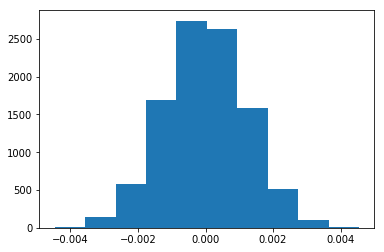

In [66]:
# Sice we considered the p_new and p_old the same, this are the distribution under the null
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**

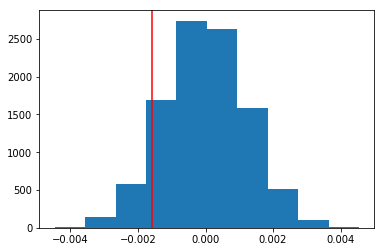

In [67]:
# using the p_treat and p_count from early
# this values are the observed statistics
diffs = p_treat - p_cont
diffs
plt.hist(p_diffs)
plt.axvline(diffs, color = "r")

In [68]:
# finding p-value
p_diffs = np.array(p_diffs)
(p_diffs > diffs).mean()

0.9029

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color = "blue">
It is p-value, is the probability, considering the null hypothesis are true, the statistics come from the null. Since the result is 0.9, is more likey our null hypothesis are correct, in a nutshell, we fail to reject the null.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [69]:
# Finding the number of converted from each lading_page
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]

convert_old, convert_new

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [70]:
# Finding p values way more easily
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score, p_value 

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font color = "blue">The z-score indicates how many standard deviations the observation values is from the mean, which is 1.31, and since 95% of the elements have a z-score between -2 and 2, we agree to fail to reject the null along with p-value with the value 0.905, that means we are 90% sure the observation values comes from the null.
Yes this values conresponds the findings in parts **j.** and **k.**</font>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color = "blue">Logistic Regression</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [71]:
# Creating a copy, best practices
# Setting the intercept to 1
# Getting the dummies variable from group
df_stats = df2.copy()
df_stats['intercept'] = 1
df_stats[['control','treatment']] = pd.get_dummies(df_stats['group'])
df_stats.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  control  treatment  
0          1        1          0  
1          1        1          0  
2          1        0          1  
3          1        0          1  
4          1        1          0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [72]:
# Creating the classifier using control as base line
# fiting the model
logit =  sm.Logit(df_stats['converted'],df_stats[['intercept','treatment']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [73]:
# resume the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        23:58:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<font color ="blue"> p-value associated with ab_page is 0.190, is differ from the value found in Part II, p-value 0.90, because the altervative hypothesis in a Logistic Regression are (Pnew != Pold) and we did (Pnew > Pold). Since our erro is 0.05 this p-value is still high to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color ="blue">Yes and No.
Yes because we can add some factors to help to avoid the Simpson's paradox and try to see someting we are missing.
    
No because adding additional terms can makes interpretation of coefficients difficult and if the factors are not correlated the interpretation can be wrong.

In a nutshell, adding a few more factors can help, but need to be careful.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [74]:
# loading new data
# Combine with df_stats
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df_stats.set_index('user_id'), how='inner')
df_new

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   
909908       UK  2017-01-06 20:44:26.334764  treatment     new_page   
811617       US  2017-01-02 18:42:11.851370  treatment     new_page   
938122       US  2017-01-10 09:32:08.222716  treatment     new_page   
887018       US  2017-01-06 11:09:40.487196  treatment     new_page   
820683       US  2017-01-14 11:52:06.521342  treatment     new_page   
697357       US  2017-01-15 05:21:57.086762  treatment     new_page   
748296       US  2017-01-10 04:05:24.283883  treatment     new_page   
666132       UK  2017-01-19 22:45:47.593706  treatment     new_page   
668810       UK  2017-01-13 16:59:49.226184  treatment     new_page   
940939       US  2017-01-08 10:10:27.267660  treatment     new_page   
646414       US  2017-01-07 10:06:42.693231    control     old_page   
907385       US  2017-01-17 13:29:52.718288    control     old_page   
698200       US  2017-01-21 21:50:42.718525  treatment     new_page   
738692       US  2017-01-08 07:03:08.917332    control     old_page   
724651       US  2017-01-07 21:32:07.568614    control     old_page   
662682       US  2017-01-08 22:48:46.350610  treatment     new_page   
639818       US  2017-01-21 21:46:38.906148  treatment     new_page   
920941       US  2017-01-21 12:26:25.304141    control     old_page   
804632       US  2017-01-03 08:37:34.233194    control     old_page   
684798       UK  2017-01-19 16:36:41.202599    control     old_page   
766270       UK  2017-01-22 10:11:29.823099  treatment     new_page   
857817       UK  2017-01-18 22:21:01.405272  treatment     new_page   
750698       UK  2017-01-15 23:31:02.321891  treatment     new_page   
721445       US  2017-01-03 02:19:44.388206    control     old_page   
744732       UK  2017-01-22 05:00:19.003615    control     old_page   
...         ...                         ...        ...          ...   
834931       UK  2017-01-06 20:20:20.082513  treatment     new_page   
667920       US  2017-01-09 03:00:15.337219  treatment     new_page   
869193       US  2017-01-22 21:18:40.153019    control     old_page   
737522       US  2017-01-14 17:43:30.555545  treatment     new_page   
937048       UK  2017-01-16 05:32:01.893266    control     old_page   
689274       UK  2017-01-09 11:39:14.209283    control     old_page   
916713       US  2017-01-19 07:43:21.591415  treatment     new_page   
894324       US  2017-01-06 22:52:33.280021  treatment     new_page   
816587       US  2017-01-03 00:02:26.952613  treatment     new_page   
905950       US  2017-01-16 03:10:23.770071  treatment     new_page   
865612       US  2017-01-17 18:25:12.503775    control     old_page   
766165       US  2017-01-05 09:41:30.417265  treatment     new_page   
664716       US  2017-01-04 16:53:19.145462  treatment     new_page   
893381       UK  2017-01-12 21:15:01.053176    control     old_page   
746186       UK  2017-01-13 15:09:49.931508  treatment     new_page   
815837       US  2017-01-09 15:02:49.049787  treatment     new_page   
646239       US  2017-01-03 22:05:22.504709    control     old_page   
703088       US  2017-01-04 23:53:49.761544  treatment     new_page   
758018       UK  2017-01-10 07:25:26.419988  treatment     new_page   
663071       UK  2017-01-22 05:42:11.888107    control     old_page   
635122       US  2017-01-20 13:07:51.125996    control     old_page   
757673       UK  2017-01-03 21:17:23.416244  treatment     new_page   
870839       US  2017-01-15 21:22:00.479523  treatment     new_page   
659679       US  2017-01-14 23:4

In [75]:
# Setting the invercept to 1 as usual
# Creating dummies variables from the new categories
# Creating and fiting the model using 'ca' and 'control' as base line
# Resume the results
df_new['intercept'] =1
df_new[['us','uk','ca']] = pd.get_dummies(df_new['country'])
logit = sm.Logit(df_new['converted'],df_new[['intercept','us','uk','treatment']])
result = logit.fit()
df_new.head() , result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


(        country                   timestamp      group landing_page  \
 user_id                                                               
 834778       UK  2017-01-14 23:08:43.304998    control     old_page   
 928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
 822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
 711597       UK  2017-01-22 03:14:24.763511    control     old_page   
 710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   
 
          converted  intercept  control  treatment  us  uk  ca  
 user_id                                                        
 834778           0          1        1          0   0   1   0  
 928468           0          1        0          1   0   0   1  
 822059           1          1        0          1   0   1   0  
 711597           0          1        1          0   0   1   0  
 710616           0          1        0          1   0   1   0  ,
 <class 'statsmodels.iolib.summary.Sum

<font color = "blue"> Its appears the contrys don't have any statistical significance, their p-valor are bigger

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [76]:
# Using Logistic Regression
logit = sm.Logit(df_new['treatment'],df_new[['intercept','us','uk']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.760413
         Iterations 3


C:\Users\Daniel Vieira\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Daniel Vieira\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Daniel Vieira\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              treatment   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Oct 2018   Pseudo R-squ.:                     inf
Time:                        23:58:25   Log-Likelihood:            -2.2096e+05
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.004      0.414      0.679      -0.007       0.011
us             0.0124      0.017      0.720      0.472      -0.021       0.046
uk            -0.0088      0.009     -1.023      0.306      -0.026       0.008
==============================================================================
"""

In [78]:
# using Linear Regression
logit = sm.OLS(df_new['treatment'],df_new[['intercept','us','uk']])
result = logit.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              treatment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8946
Date:                Wed, 10 Oct 2018   Prob (F-statistic):              0.409
Time:                        00:37:59   Log-Likelihood:            -2.1090e+05
No. Observations:              290584   AIC:                         4.218e+05
Df Residuals:                  290581   BIC:                         4.218e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5005      0.001    451.655      0.000       0.498       0.503
us             0.0031      0.004      0.720      0.472      -0.005       0.012
uk            -0.0022      0.002     -1.023      0.306      -0.006       0.002
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.999   Jarque-Bera (JB):            48429.474
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = "blue"> The p values for the countries are larger indicating they are not statistically significant

<a id='conclusions'></a>
## Conclusions

- We fail to reject the null in both tests
- The old page proves to be equal or better the new page
- Country proves to be no use in analysis
- Logistic Regression also gives results that agree with the results of A/B testing

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.